Dec 10, 2021

Jason Cardinal Exercise Notebook Lighthouse Labs - Hierarchical Clustering

[https://data.compass.lighthouselabs.ca/days/w03d4/activities/478]

this notebook contains the code along notes

## Hierachical Models Assignment

In [2]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [4]:
last_two = df.iloc[:,-2:]
last_two

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


* define function plot_dendogram

In [5]:
def plot_dendogram(X, method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title('Dendrogram')
    plt.ylabel('Euclidean distances')
    plt.xlabel('Point')

* Plot dendrogram

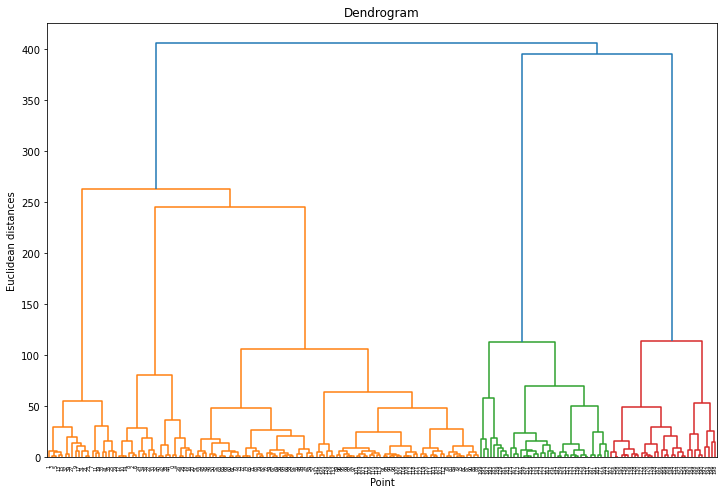

In [6]:
plot_dendogram(last_two)

* Fit Hierarchical clustering with optimal number of clusters

In [7]:
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters =5)

y_hc = ac.fit_predict(last_two)

* define function plot_clusters

In [8]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster].iloc[:,0]
        y = X[y_res == cluster].iloc[:,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    label = f'cluster {cluster}',
                    marker = 's')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    label = 'centers',
                    marker = '*',
                    s = 250)

    plt.legend()
    plt.grid()
    plt.show()

* Plot HC clusters

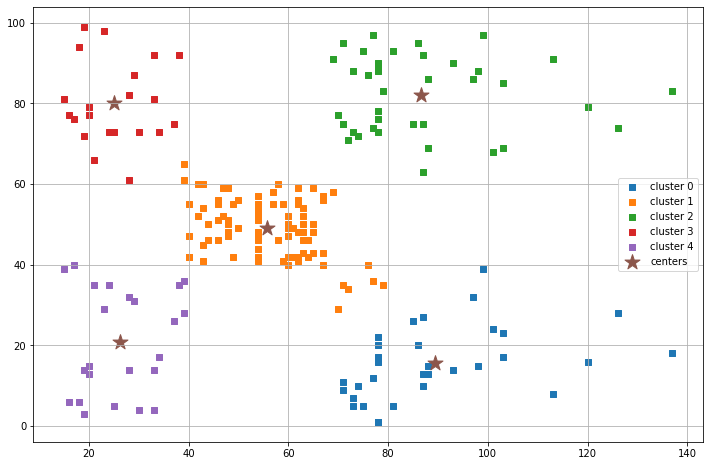

In [9]:
plot_clusters(last_two, y_hc, plt_cluster_centers=True)